In [92]:
#https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8

In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib.ticker import FormatStrFormatter
import sqlite3
import matplotlib.pyplot as plt
import sklearn


DB_PATH = "/Users/mimi/Desktop/PYTHON/TURING/HOME/M2/data/mental_health.sqlite"
conn = sqlite3.connect(DB_PATH)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)


In [2]:
tech_work = pd.read_sql(
    """ 
    SELECT *
    FROM Answer 
    WHERE UserID IN (SELECT UserID FROM Answer WHERE QuestionID IS 68 AND AnswerText IS 1);""",
    conn)

questions_df = tech_work[tech_work['QuestionID'].isin([12, 14, 15, 16, 17])]

tech_work.head()

In [4]:
df = pd.read_sql(
    """ 
    SELECT *
    FROM Answer 
    ;""",
    conn)
df_questions = pd.read_sql(
    """ 
    SELECT *
    FROM Question 
    ;""",
    conn)
df_survey = pd.read_sql(
    """ 
    SELECT *
    FROM Survey 
    ;""",
    conn)



In [7]:
df_survey.SurveyID.value_counts().to_frame()

,SurveyID
2014,1
2016,1
2017,1
2018,1
2019,1


In [8]:
df_questions.head()

,questiontext,questionid
0,What is your age?,1
1,What is your gender?,2
2,What country do you live in?,3
3,"If you live in the United States, which state ...",4
4,Are you self-employed?,5


In [10]:
df_questions.shape

(105, 2)

### Total Users Per SurveyID

In [17]:
surveyid = pd.read_sql(
    """
    SELECT COUNT(DISTINCT(QuestionID)) as Questions, SurveyID, COUNT(DISTINCT(UserID)) as Users
    FROM Answer
    GROUP BY SurveyID""", conn)

surveyid

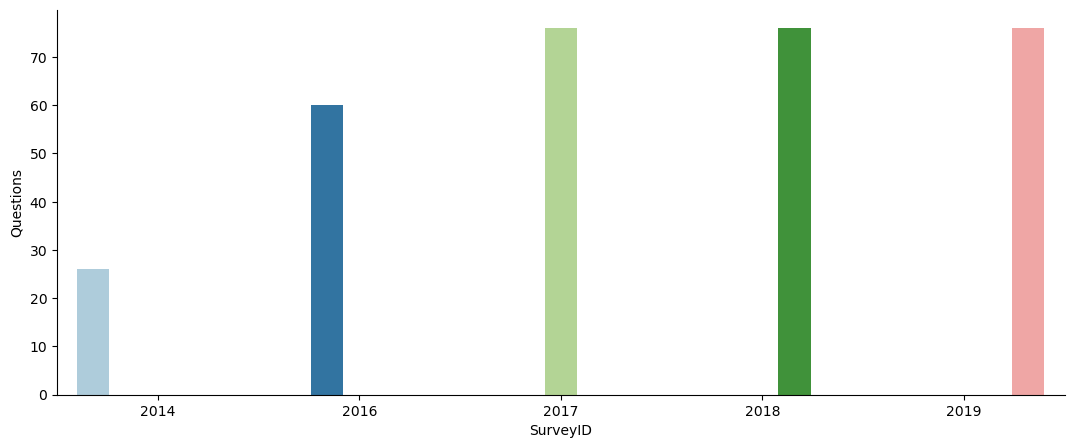

In [103]:
plt.figure(figsize=(13,5))
g = sns.barplot(hue="SurveyID",y="Questions", x="SurveyID", data=surveyid, palette="Paired" )
g.legend_.remove()
sns.despine()



plt.show()


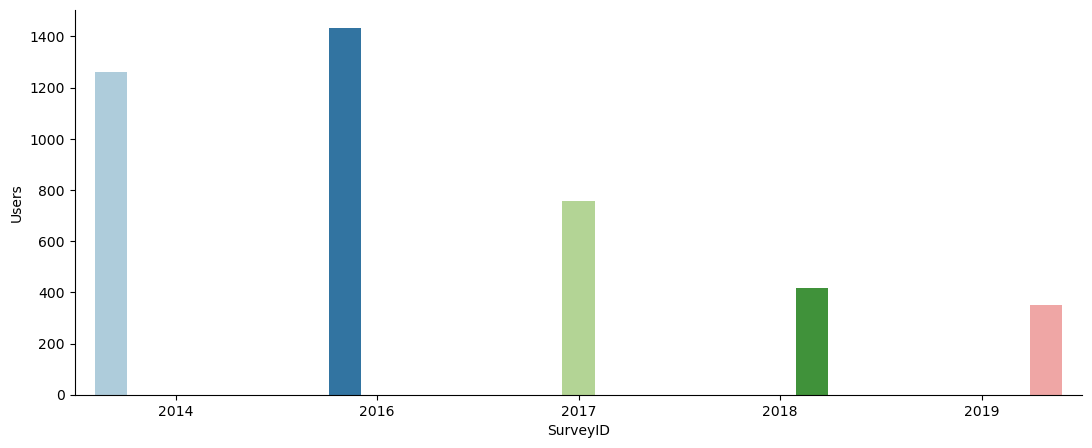

In [102]:
plt.figure(figsize=(13,5))
g = sns.barplot(hue="SurveyID",y="Users", x="SurveyID", data=surveyid, palette="Paired" )
g.legend_.remove()
sns.despine()



plt.show()


remote work vs office

In [139]:
#  and work remote q5

In [147]:
df[df['QuestionID'] == 5]['AnswerText'].value_counts()

0     3550
1      650
-1      18
Name: AnswerText, dtype: int64

In [191]:
q5 = df[df['QuestionID'] == 5]
q5 = q5[q5.AnswerText != "-1"]


In [192]:
q5.head()

,AnswerText,SurveyID,UserID,QuestionID
5058,1,2014,19,5
5059,1,2014,20,5
5060,0,2014,21,5
5061,1,2014,22,5
5062,0,2014,23,5


In [ ]:
q12 = pd.read_sql(
    """ 
    SELECT *
    FROM Answer 
    WHERE UserID IN (SELECT UserID FROM Answer WHERE QuestionID IS 68 AND AnswerText IS 1)
    AND QuestionID is 12;""",
    conn)


q12 = q12['AnswerText'].to_frame()


q14 = pd.read_sql(
    """ 
    SELECT *
    FROM Answer 
    WHERE UserID IN (SELECT UserID FROM Answer WHERE QuestionID IS 68 AND AnswerText IS 1)
    AND QuestionID is 14;""",
    conn)


q14 = q14['AnswerText'].to_frame()




fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.subplots_adjust(wspace=0.3)

sns.histplot(ax=ax[0],
             hue=q14['AnswerText'],
             data=q14,
             legend=False,
            x=q14['AnswerText']
            )
ax[0].set_title('MH Care Options Awareness')
sns.despine()

sns.histplot(ax=ax[1],
    hue=q12['AnswerText'],
             data=q12,
             legend=False,
            x=q12['AnswerText']
            )

ax[1].set_title('MH During Interview')
sns.despine()
plt.show()

In [136]:
df[df['QuestionID'] == 1].head()

,AnswerText,SurveyID,UserID,QuestionID
0,37,2014,1,1
1,44,2014,2,1
2,32,2014,3,1
3,31,2014,4,1
4,31,2014,5,1


In [ ]:
pd.merge(d1, d2, how='inner', on=["UserID"]) 

In [ ]:
idx1.intersection(idx2)

All questions seem to have the same number of answers. Is it becaus eempty answers are counted as an answer as well?


Q12 States:

Would you bring up a mental health issue with a potential employer in an interview?

In [71]:
q12 = pd.read_sql(
    """ 
    SELECT *
    FROM Answer 
    WHERE UserID IN (SELECT UserID FROM Answer WHERE QuestionID IS 68 AND AnswerText IS 1)
    AND QuestionID is 12;""",
    conn)


q12 = q12['AnswerText'].to_frame()

Q14 States:

Do you know the options for mental health care 
available under your employer-provided health coverage?


In [47]:
q14 = pd.read_sql(
    """ 
    SELECT *
    FROM Answer 
    WHERE UserID IN (SELECT UserID FROM Answer WHERE QuestionID IS 68 AND AnswerText IS 1)
    AND QuestionID is 14;""",
    conn)


q14 = q14['AnswerText'].to_frame()

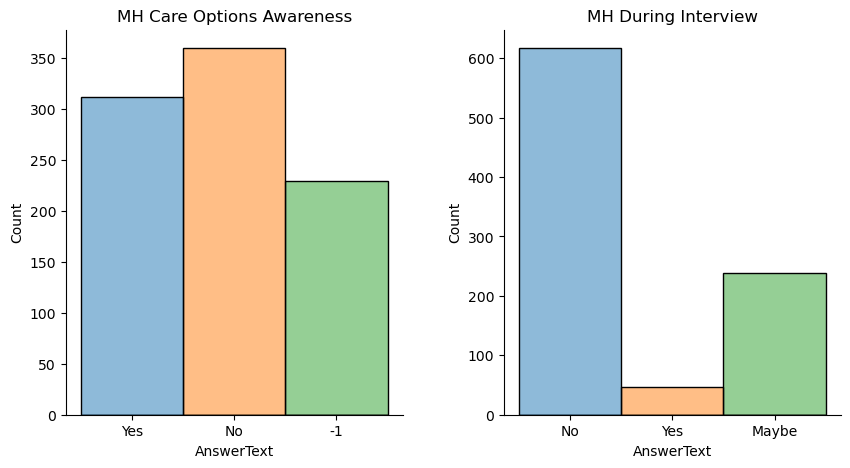

In [98]:
q12 = pd.read_sql(
    """ 
    SELECT *
    FROM Answer 
    WHERE UserID IN (SELECT UserID FROM Answer WHERE QuestionID IS 68 AND AnswerText IS 1)
    AND QuestionID is 12;""",
    conn)


q12 = q12['AnswerText'].to_frame()


q14 = pd.read_sql(
    """ 
    SELECT *
    FROM Answer 
    WHERE UserID IN (SELECT UserID FROM Answer WHERE QuestionID IS 68 AND AnswerText IS 1)
    AND QuestionID is 14;""",
    conn)


q14 = q14['AnswerText'].to_frame()




fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.subplots_adjust(wspace=0.3)

sns.histplot(ax=ax[0],
             hue=q14['AnswerText'],
             data=q14,
             legend=False,
            x=q14['AnswerText']
            )
ax[0].set_title('MH Care Options Awareness')
sns.despine()

sns.histplot(ax=ax[1],
    hue=q12['AnswerText'],
             data=q12,
             legend=False,
            x=q12['AnswerText']
            )

ax[1].set_title('MH During Interview')
sns.despine()
plt.show()

In [95]:
tech_work[tech_work['AnswerText'] == '-1'].shape

(18892, 4)

In [97]:
tech_work[tech_work['AnswerText'] == '-1']['QuestionID'].value_counts().head()

84    901
80    865
66    838
79    794
55    782
Name: QuestionID, dtype: int64

In [99]:
questions_df.head()

,AnswerText,SurveyID,UserID,QuestionID
5016,No,2017,2695,12
5017,No,2017,2696,12
5018,No,2017,2699,12
5019,No,2017,2700,12
5020,No,2017,2701,12


In [104]:


#Question 15: Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?
#Question 16: Does your employer offer resources to learn more about mental health disorders and options for seeking help?

In [ ]:
tech_work[]

In [107]:
q15 = questions_df[questions_df['QuestionID'] == 15]
q16 = questions_df[questions_df['QuestionID'] == 16]


In [115]:
q15[q15['AnswerText'] == "Yes"]['SurveyID'].value_counts(), q16[q16['AnswerText'] == "Yes"]["UserID"]

2017    89
2018    53
2019    51
Name: SurveyID, dtype: int64